In [2]:
# !pip install numpy pandas seaborn scikit-learn matplotlib scipy ipywidgets ipykernel optuna streamlit plotly

# EDA e Visualização de Dados
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

# ML
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Otimização
import optuna

### Carregar os dados

In [4]:
# Carregar Dataframe

df_species = pd.read_csv('./Datasets/species_dataset.csv')

In [5]:
# Analisar a estrutura

df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species_id          600 non-null    object 
 1   body_mass_kg        600 non-null    float64
 2   num_legs            600 non-null    int64  
 3   has_wings           600 non-null    int64  
 4   tail_length_cm      600 non-null    float64
 5   diet_type           600 non-null    object 
 6   eye_count           600 non-null    int64  
 7   skin_type           600 non-null    object 
 8   nocturnal           600 non-null    int64  
 9   avg_lifespan_years  600 non-null    float64
 10  has_venom           600 non-null    int64  
 11  social_behavior     600 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 56.4+ KB


In [39]:
# Visualizar os primeiros registro

df_species.head(10)

,species_id,body_mass_kg,num_legs,has_wings,tail_length_cm,diet_type,eye_count,skin_type,nocturnal,avg_lifespan_years,has_venom,social_behavior,cluster
0,SP000,59.934283,6,1,27.622702,carnivore,2,fur,0,118.957538,0,pair-living,46
1,SP001,47.234714,6,1,25.521165,carnivore,4,fur,0,121.226422,0,solitary,30
2,SP002,62.953771,8,1,50.794426,carnivore,2,fur,0,119.454890,0,pair-living,47
3,SP003,80.460597,2,1,46.476993,carnivore,4,fur,1,121.522981,0,solitary,3
4,SP004,45.316933,4,0,40.161889,herbivore,2,scales,0,120.060929,0,group-living,122
5,SP005,45.317261,4,0,41.685437,omnivore,4,feathers,0,118.593000,1,group-living,56
6,SP006,81.584256,4,0,47.104705,carnivore,4,fur,1,119.828973,0,pair-living,34
7,SP007,65.348695,6,1,43.354369,carnivore,2,fur,1,118.937223,0,pair-living,111
8,SP008,40.610512,6,0,31.594468,omnivore,2,skin,0,120.589349,0,solitary,60
9,SP009,60.851201,2,1,54.130002,herbivore,2,scales,1,119.738637,0,pair-living,97


In [7]:
# Visualizar os últimos registro

df_species.tail(10)

,species_id,body_mass_kg,num_legs,has_wings,tail_length_cm,diet_type,eye_count,skin_type,nocturnal,avg_lifespan_years,has_venom,social_behavior
590,SP590,51.431325,0,0,28.470813,carnivore,2,feathers,0,118.994146,0,solitary
591,SP591,40.446851,0,0,57.031126,herbivore,2,skin,1,118.290690,0,pair-living
592,SP592,59.579597,6,1,36.453271,herbivore,2,skin,0,120.651345,0,group-living
593,SP593,56.673242,2,1,48.350371,herbivore,2,feathers,0,118.680936,0,pair-living
594,SP594,70.750799,6,0,45.079643,omnivore,2,feathers,0,120.983923,0,pair-living
595,SP595,39.799672,4,0,55.037095,herbivore,2,scales,0,120.394072,0,group-living
596,SP596,44.602501,6,0,66.874888,herbivore,2,fur,1,120.294341,0,solitary
597,SP597,30.424726,0,1,32.096355,herbivore,2,fur,0,121.665309,1,pair-living
598,SP598,41.114135,0,0,38.510861,omnivore,2,skin,0,118.714197,0,group-living
599,SP599,57.546010,8,0,46.890925,carnivore,4,feathers,0,120.873772,0,pair-living


### EDA

In [8]:
# Estatística das Variáveis

df_species.describe()

,body_mass_kg,num_legs,has_wings,tail_length_cm,eye_count,nocturnal,avg_lifespan_years,has_venom
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,49.784101,3.950000,0.285000,45.052394,2.203333,0.380000,120.024664,0.150000
std,19.297540,2.833882,0.451791,9.930405,1.074203,0.485791,0.976676,0.357369
min,5.000000,0.000000,0.000000,16.287173,0.000000,0.000000,117.364032,0.000000
25%,36.107729,2.000000,0.000000,38.446490,2.000000,0.000000,119.366525,0.000000
50%,50.154768,4.000000,0.000000,45.266501,2.000000,0.000000,120.008112,0.000000
75%,62.463348,6.000000,1.000000,51.858016,2.000000,1.000000,120.684532,0.000000
max,127.054630,8.000000,1.000000,72.308672,4.000000,1.000000,123.657702,1.000000


In [10]:
# Checar variável diet_type

df_species['diet_type'].unique()

array(['carnivore', 'herbivore', 'omnivore'], dtype=object)

In [9]:
# Distribuição da variável diet_type

percentual_diet_type = df_species.value_counts('diet_type') / len(df_species) * 100
px.bar(percentual_diet_type, color=percentual_diet_type.index)

### Treinar modelos clustering hierárquicos

In [ ]:
# Selecionar as colunas para clusterização

X = df_species.copy()

# Remover colunas desnecessárias
X.drop(columns=['species_id'], axis=1, inplace=True)

In [ ]:
# Separando variáveis numéricas e categóricas

numeric_features = ['body_mass_kg', 'num_legs', 'has_wings', 'tail_length_cm', 'eye_count', 'nocturnal', 'avg_lifespan_years', 'has_venom']
categorical_features = ['diet_type', 'skin_type', 'social_behavior']

# Definir transformações
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [13]:
# Criar Pre Processador de Transformações

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

# Visualizar X_transformed
X_transformed

array([[ 0.5264221 ,  0.72399302,  1.58391033, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13221963,  0.72399302,  1.58391033, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.68302273,  1.43032767,  1.58391033, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.00404132, -1.39501093,  1.58391033, ...,  0.        ,
         1.        ,  0.        ],
       [-0.44965315, -1.39501093, -0.63134887, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.40255834,  1.43032767, -0.63134887, ...,  0.        ,
         1.        ,  0.        ]], shape=(600, 18))

In [20]:
def hierarchical_agglomerative_objective(trial):
    # Definindo os hiperparâmetros a serem ajustados
    n_clusters = trial.suggest_int('n_clusters', 10, 150)
    linkage = trial.suggest_categorical('linkage', ['ward', 'average', 'complete', 'single'])
    
    # Instanciar o modelo
    hierarchical_model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)
    
    # Treinar o modelo e já executar a clusterização
    y_predict = hierarchical_model.fit_predict(X_transformed)
    
    # Calcular o silhouette Score
    silhouette_avg = silhouette_score(X_transformed, y_predict)
    
    return silhouette_avg

In [18]:
# Criar um estudo no Optuna

search_space_ag = {'n_clusters': range(10,151), 'linkage':['ward', 'average', 'complete', 'single']}
sampler_ag = optuna.samplers.GridSampler(search_space=search_space_ag)
estudo_ag = optuna.create_study(direction='maximize', sampler=sampler_ag)

[I 2025-08-27 11:15:41,377] A new study created in memory with name: no-name-c62b351d-833f-473e-80e1-75b9975036d3


In [21]:
#executar estudo do Optuna para Agglomerative

estudo_ag.optimize(hierarchical_agglomerative_objective, n_trials=600)

[I 2025-08-27 11:16:25,017] Trial 1 finished with value: 0.06952264766223992 and parameters: {'n_clusters': 44, 'linkage': 'complete'}. Best is trial 1 with value: 0.06952264766223992.


[I 2025-08-27 11:16:25,047] Trial 2 finished with value: 0.07090101644156098 and parameters: {'n_clusters': 57, 'linkage': 'average'}. Best is trial 2 with value: 0.07090101644156098.
[I 2025-08-27 11:16:25,070] Trial 3 finished with value: 0.06751505762324567 and parameters: {'n_clusters': 46, 'linkage': 'complete'}. Best is trial 2 with value: 0.07090101644156098.
[I 2025-08-27 11:16:25,133] Trial 4 finished with value: 0.11399187022420045 and parameters: {'n_clusters': 140, 'linkage': 'complete'}. Best is trial 4 with value: 0.11399187022420045.
[I 2025-08-27 11:16:25,159] Trial 5 finished with value: 0.0990955747361001 and parameters: {'n_clusters': 150, 'linkage': 'average'}. Best is trial 4 with value: 0.11399187022420045.
[I 2025-08-27 11:16:25,178] Trial 6 finished with value: 0.11365035349814018 and parameters: {'n_clusters': 145, 'linkage': 'complete'}. Best is trial 4 with value: 0.11399187022420045.
[I 2025-08-27 11:16:25,200] Trial 7 finished with value: 0.0962635316747119

In [22]:
# Mostrar melhor configuração do Optuna (Agglomerative)

best_params_ag = estudo_ag.best_params
best_value_ag = estudo_ag.best_value
print(f"Clusters = {best_params_ag['n_clusters']}")
print(f"Linkage = {best_params_ag['linkage']}")
print(f"Melhor valor (Aglomerativo): {best_value_ag}")

Clusters = 150
Linkage = ward
Melhor valor (Aglomerativo): 0.13129813063305099


In [23]:
def hierarchical_divisive_objective(trial):
    # Definindo os hiperparâmetros a serem ajustados
    n_clusters = trial.suggest_int('n_clusters', 10, 150)
    
    # Instanciar o modelo
    hierarchical_model = BisectingKMeans(n_clusters=n_clusters)
    
    # Treinar o modelo e já executar a clusterização
    y_predict = hierarchical_model.fit_predict(X_transformed)
    
    # Calcular o silhouette Score
    silhouette_avg = silhouette_score(X_transformed, y_predict)
    
    return silhouette_avg

In [24]:
# Criar um estudo no Optuna

search_space_di = {'n_clusters': range(10,151)}
sampler_di = optuna.samplers.GridSampler(search_space=search_space_di)
estudo_di = optuna.create_study(direction='maximize', sampler=sampler_di)

[I 2025-08-27 11:19:12,806] A new study created in memory with name: no-name-330c1d33-fa93-4b7b-8830-dbc0abe5f0cd


In [25]:
#executar estudo do Optuna para divisive

estudo_di.optimize(hierarchical_divisive_objective, n_trials=200)

[I 2025-08-27 11:19:30,638] Trial 0 finished with value: 0.04622845514235528 and parameters: {'n_clusters': 55}. Best is trial 0 with value: 0.04622845514235528.
[I 2025-08-27 11:19:30,783] Trial 1 finished with value: 0.05271021972994656 and parameters: {'n_clusters': 70}. Best is trial 1 with value: 0.05271021972994656.
[I 2025-08-27 11:19:30,834] Trial 2 finished with value: 0.05982643869835679 and parameters: {'n_clusters': 17}. Best is trial 2 with value: 0.05982643869835679.
[I 2025-08-27 11:19:30,949] Trial 3 finished with value: 0.05366688248968516 and parameters: {'n_clusters': 61}. Best is trial 2 with value: 0.05982643869835679.
[I 2025-08-27 11:19:31,082] Trial 4 finished with value: 0.04320390250541123 and parameters: {'n_clusters': 76}. Best is trial 2 with value: 0.05982643869835679.
[I 2025-08-27 11:19:31,165] Trial 5 finished with value: 0.06297973822043479 and parameters: {'n_clusters': 37}. Best is trial 5 with value: 0.06297973822043479.
[I 2025-08-27 11:19:31,316] 

In [26]:
# Mostrar melhor configuração do Optuna (divisive)

best_params_di = estudo_di.best_params
best_value_di = estudo_di.best_value
print(f"Clusters = {best_params_di['n_clusters']}")
print(f"Melhor valor (Divisivo): {best_value_di}")

Clusters = 15
Melhor valor (Divisivo): 0.08195149521584094


Com isso nota-se que a configuração com melhor resultado foi a: Agglomerative

In [27]:
# Criar Modelo com melhor configuração (Agglomerative)

best_model = AgglomerativeClustering(
    n_clusters=best_params_ag['n_clusters'],
    linkage=best_params_ag['linkage']
)

In [28]:
# Treinar Modelo

best_model.fit(X_transformed)

,n_clusters,150
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [29]:
# Verificar Silhouette Score

best_score = silhouette_score(X_transformed, best_model.labels_)
best_score

0.13129813063305099

In [ ]:
# Criar Coluna com cluster escolhido no Dataframe original

df_species['cluster'] = best_model.labels_

### Visualizar Resultados

In [32]:
# Mostrar Chart com Trials do Optuna

fig = optuna.visualization.plot_optimization_history(estudo_ag)
fig.show()

In [34]:
# Treinar modelo com Scipy

modelo_dend = linkage(X_transformed, method=best_params_ag['linkage'], optimal_ordering=True)

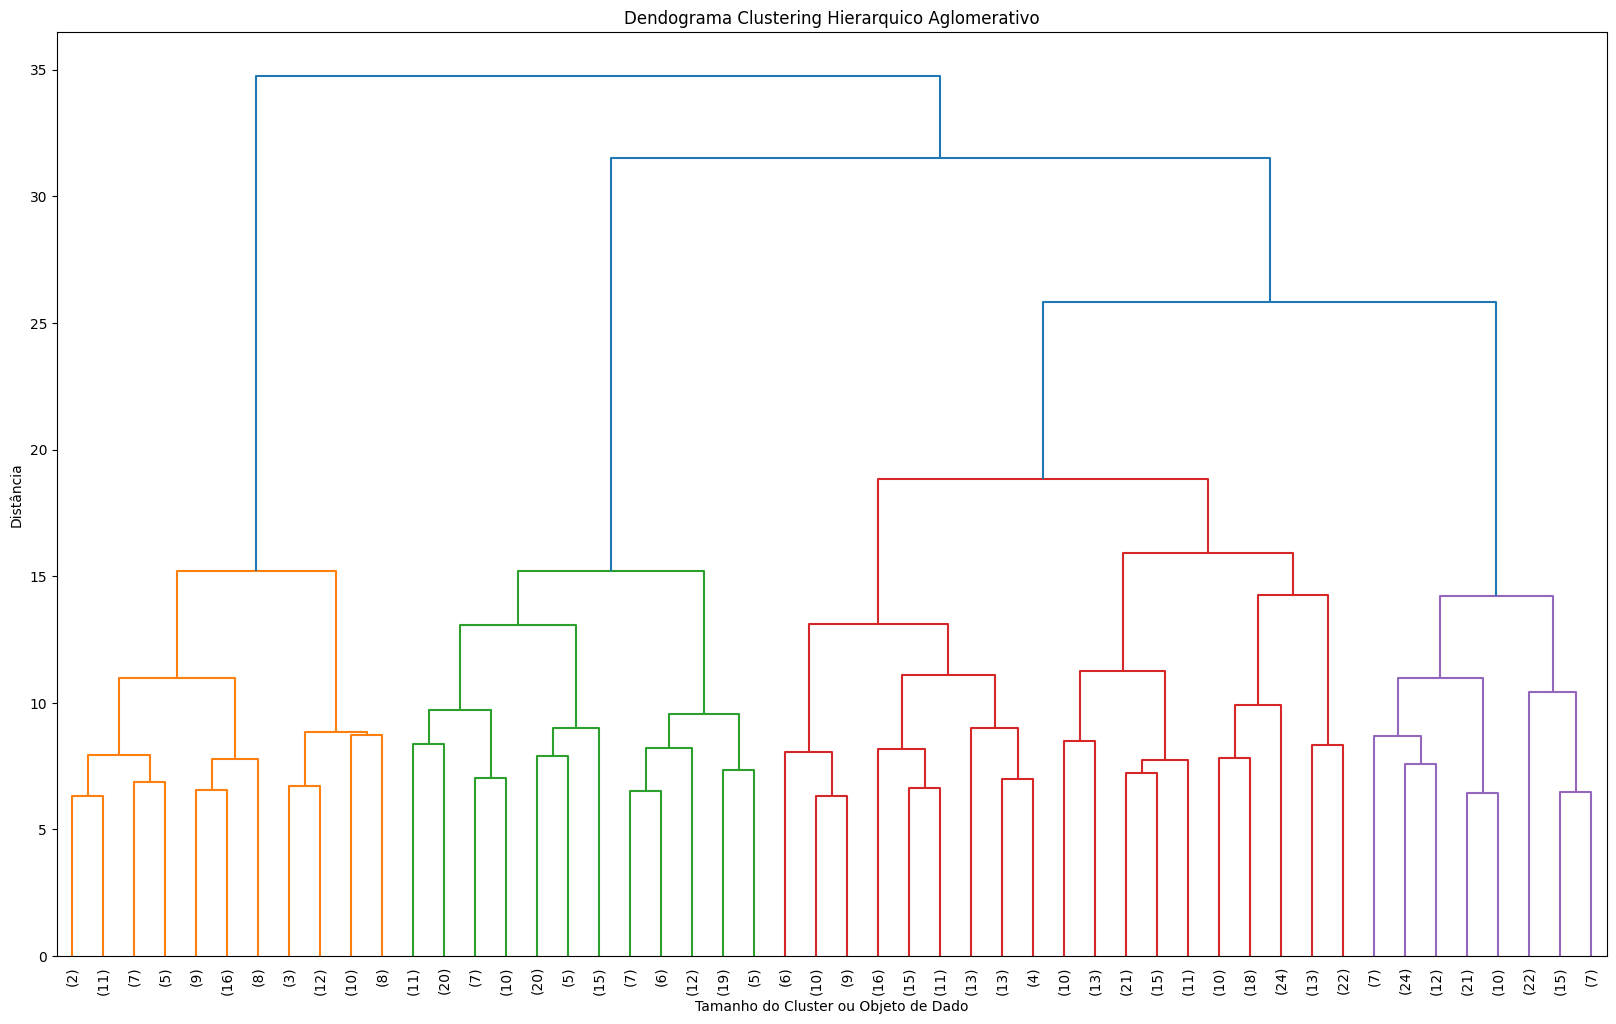

In [35]:
# Mostrar o dendrograma

plt.figure(figsize=(20,12))
dendrogram(modelo_dend, truncate_mode='lastp', p=50, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendograma Clustering Hierarquico Aglomerativo')
plt.xlabel('Tamanho do Cluster ou Objeto de Dado')
plt.ylabel('Distância')
plt.show()

In [37]:
# Cortar o dendrograma

clusters_de_scipy = cut_tree(modelo_dend, height=17)
len(np.unique(clusters_de_scipy))

5

In [40]:
# Cruzamento entre diet_type e body_mass_kg, apresentando os clusters

px.scatter(df_species, x='cluster', y='body_mass_kg', color='diet_type')

In [43]:
# Cruzamento entre diet_type e body_mass_kg, apresentando os clusters

px.scatter(df_species, x='diet_type', y='body_mass_kg', color='cluster')

In [44]:
# Cruzamento entre diet_type e avg_lifespan_years, apresentando os clusters

px.scatter(df_species, x='cluster', y='avg_lifespan_years', color='diet_type')

In [46]:
# Cruzamento entre diet_type e avg_lifespan_years, apresentando os clusters

px.scatter(df_species, x='avg_lifespan_years', y='cluster', color='cluster')

In [47]:
# Distribuição da variável cluster

percentual_cluster = df_species.value_counts('cluster') / len(df_species) * 100
px.bar(percentual_cluster, color=percentual_cluster.index)

In [48]:
# Distribuição da variável cluster

qtde_cluster = df_species.value_counts('cluster')
px.bar(qtde_cluster, color=qtde_cluster.index)

### **Resultados Obtidos:**

**Introdução:**
O objetivo foi agrupar 600 espécies fictícias com base em características morfológicas, fisiológicas e comportamentais, a fim de identificar padrões taxonômicos semelhantes aos encontrados na biologia evolutiva.

**Pré-processamento:**
Foram utilizadas 8 variáveis numéricas/binárias (massa corporal, número de pernas, presença de asas, comprimento da cauda, número de olhos, atividade noturna, expectativa de vida e presença de veneno) e 3 variáveis categóricas codificadas (tipo de dieta, tipo de pele e comportamento social). As variáveis numéricas foram padronizadas e as categóricas transformadas via One-Hot Encoding para cálculo de distâncias.

**Método:**
Foi aplicada clusterização hierárquica aglomerativa utilizando o método de linkage ‘ward’ e divisive com 10 a 15 clusters, comparando os resultados por métrica de silhueta. Onde foi verificado que o melhor método seria o Aglomerativo.

**Resultados:**
O algoritmo aglomerativo gerou 150 clusters com score de silhueta 0.13, enquanto o divisivo gerou 15 clusters com score de 0.082. Apesar do score maior do aglomerativo, optou-se por analisar o divisivo, que apresenta um número de clusters mais interpretável biologicamente.

**Conclusão:**
A clusterização hierárquica permitiu identificar grupos taxonômicos coerentes dentro do dataset fictício, demonstrando que características morfológicas e comportamentais podem ser usadas para diferenciar espécies. Apesar de diferenças de métricas, a análise qualitativa indica que ambos os métodos (aglomerativo e divisivo) fornecem insights úteis, com preferência por um número moderado de clusters para interpretação biológica. Notando-se, assim que o modelo conseguiu clusterizar os dados as espécies, de uma forma aceitável.